3.1 Третье задание

In [41]:
from skimage.io import imread, imshow
from skimage import img_as_float
%matplotlib inline

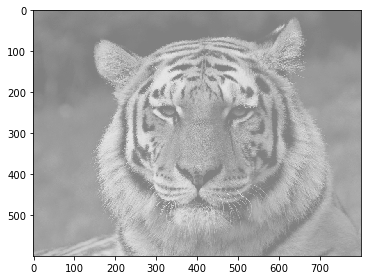

In [42]:
img = imread('tiger-low-contrast.png')
imshow(img)

In [43]:
k = round(img.size*0.05)
img

array([[144, 141, 141, ..., 128, 128, 128],
       [142, 143, 144, ..., 128, 128, 128],
       [142, 142, 140, ..., 128, 128, 128],
       ...,
       [172, 166, 168, ..., 178, 175, 170],
       [166, 167, 167, ..., 171, 172, 175],
       [166, 168, 167, ..., 174, 175, 174]], dtype=uint8)

In [44]:
from numpy import histogram
values, bin_edges = histogram(img, bins=range(257))

In [45]:
count = 0
for i in range(256):
    count += values[i]
    if count > k:
        x_min = i
        break
count = 0
for i in range(255, -1, -1):
    count += values[i]
    if count > k:
        x_max = i
        break
print(x_max, x_min)

208 129


In [46]:
#По формуле применяется к каждому пикселю
img = img.astype('float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i,j] -= x_min
        img[i,j] *= 255/(x_max-x_min)
#клип надо сделать до перевода в целые, иначе -3 превратится в 253 (примерно)
from numpy import clip
img = clip(img, 0, 255)
img = img.astype('uint8')

In [47]:
img

array([[ 48,  38,  38, ...,   0,   0,   0],
       [ 41,  45,  48, ...,   0,   0,   0],
       [ 41,  41,  35, ...,   0,   0,   0],
       ...,
       [138, 119, 125, ..., 158, 148, 132],
       [119, 122, 122, ..., 135, 138, 148],
       [119, 125, 122, ..., 145, 148, 145]], dtype=uint8)

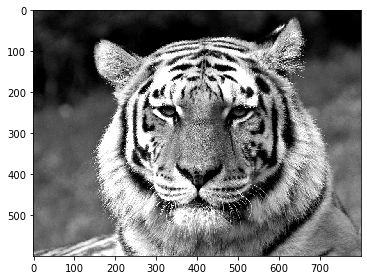

In [48]:
imshow(img)

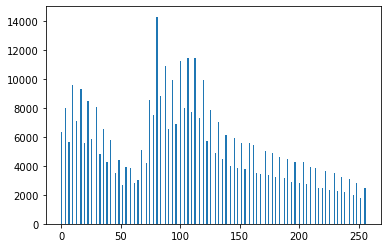

In [20]:
from matplotlib.pyplot import hist
values1, bin_edges1, patches1 = hist(img.ravel(), bins=range(257))

In [8]:
bin_edges1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18